In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector

In [2]:
img = cv2.imread('rov_pool.jpg')


In [3]:

"""cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)

#POLYGON
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5)

cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

plt.imshow(img)"""

"cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)\ncv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)\ncv2.circle(img, (50, 50), 50, (0, 0, 255), 5)\n\n#POLYGON\npts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)\npts = pts.reshape((-1, 1, 2))\ncv2.polylines(img, [pts], True, (0, 255, 255), 5)\n\ncv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)\n\nplt.imshow(img)"

In [4]:
"""at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
plt.imshow(img)"""

"at_detector = Detector(families='tag36h11',\n                       nthreads=1,\n                       quad_decimate=1.0,\n                       quad_sigma=0.0,\n                       refine_edges=1,\n                       decode_sharpening=0.25,\n                       debug=0)\ntags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)\ncolor_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)\nfor tag in tags:\n    for idx in range(len(tag.corners)):\n        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))\n\n    cv2.putText(color_img, str(tag.tag_id),\n                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),\n                fontFace=cv2.FONT_HERSHEY_SIMPLEX,\n                fontScale=0.8,\n                color=(0, 0, 255))\nplt.imshow(img)"

In [5]:
def ret_gray(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    return gray

In [6]:
 # convert to grayscale
def ret_edges(gray, threshold1=60, threshold2=100, apertureSize=3):
    edges = cv2.Canny(gray, threshold1, threshold2, apertureSize=apertureSize) # detect edges
    plt.imshow(edges)
    return edges

In [7]:
def ret_lines(edges, minLineLength=500, maxLineGap=20):
        lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/360,
                80,
                minLineLength=minLineLength,
                maxLineGap=maxLineGap,
        ) # detect lines
        return lines

In [8]:


"""x1, y1, x2, y2 = lines[0][0]
slope = (y2-y1)/(x2-x1)
slopes.append(slope)
cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2.putText(img, str(slope), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), cv2.LINE_4)"""


'x1, y1, x2, y2 = lines[0][0]\nslope = (y2-y1)/(x2-x1)\nslopes.append(slope)\ncv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)\ncv2.putText(img, str(slope), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), cv2.LINE_4)'

In [25]:
def get_lines(img, lines):
    slopes = []
    y_intercepts = []
    newLines = []

    for i in range(len(lines)):
        x1, y1, x2, y2 = lines[i][0]

        slope = (y2-y1)/(x2-x1)
        slopes.append(slope)

        y_intercept = y1 - (x1*slope)
        y_intercepts.append(y_intercept)

        slopes.sort()
        y_intercepts.sort()
        closeto = False
        
        for j in range(1, len(slopes)):
            ratio = (slopes[j-1]/slope, (y_intercepts[j-1]/y_intercept))
            if ratio[0] > 0.95 and ratio[1] > 0.95:
                slopes.remove(slope)
                closeto = True
                break
        if not closeto:
            newLines.append(lines[i])
            #cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            #cv2.putText(img, str(slope), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), cv2.LINE_4)
            closeto = False
    return  newLines



In [28]:
def detect_lines(img, threshold1=50, threshold2=150, apertureSize=3, minLineLength=100, maxLineGap=10):
    gray = ret_gray(img)
    edges = ret_edges(gray, threshold1, threshold2, apertureSize)
    lines = ret_lines(edges, minLineLength, maxLineGap)
    lineList = get_lines(img, lines)
    return lineList

In [31]:
def draw_lines(img, lines, color=(0, 255, 0)):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2-y1)/(x2-x1)
        cv2.line(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, str(slope), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 2, color, cv2.LINE_4)
    plt.imshow(img)
    return img
    

In [33]:
def get_slopes_intercepts(lines):
    slopes = []
    x_intercepts = []
    for line in lines:
        x1, y1, x2, y2 = line[0]

        slope = (y2-y1)/(x2-x1)
        slopes.append(slope)

        x_intercept = -(y1 - (x1*slope))/slope
        x_intercepts.append(x_intercept)
    
    return slopes, x_intercepts
        

In [18]:
def detect_lanes(lines):
    lanes = []
    slopes, x_intercepts = get_slopes_intercepts(lines)
    for i in range(1, len(slopes)):
        ratio = (slopes[i-1]/slopes[i], x_intercepts[i-1]/x_intercepts[i])
        if(ratio < (0.95, 0.95) and ratio > (0.8, 0.8)):
            lanes.append([slopes[i-1], slopes[i]])
    return lanes

In [14]:
def draw_lanes(img, lanes):
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 255), (0, 0, 0), (255, 255, 0), (0, 255, 255), (255, 0, 255)]
    count = 0
    for lane in lanes:
        x1a, y1a, x2a, y2a = lane[0][0]
        slope = (y2a-y1a)/(x2a-x1a)
        cv2.line(img, (x1a, y1a), (x2a, y2a), colors[count], 2)
        cv2.putText(img, str(slope), (x1a, y1a), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[count], cv2.LINE_4)


        x1b, y1b, x2b, y2b = lane[0][1]
        slope = (y2b-y1b)/(x2b-x1b)
        cv2.line(img, (x1b, y1a), (x2b, y2b), colors[count], 2)
        cv2.putText(img, str(slope), (x1b, y1b), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[count], cv2.LINE_4)
        count+=1
    plt.show()


[array([[2845, 1139, 3036, 1176]], dtype=int32)]


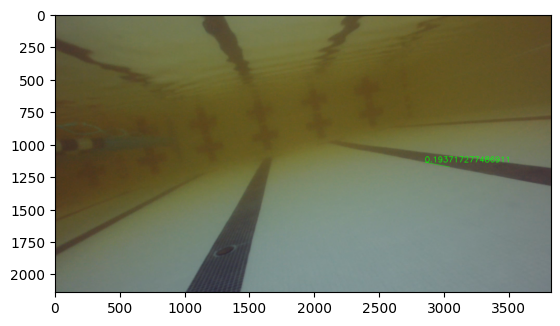

[0.193717277486911]


TypeError: 'NoneType' object is not iterable

In [36]:
img = cv2.imread('lanes.png')

lines = detect_lines(img, 30, 40, 3, 150, 10)
print(lines)
draw_lines(img, lines)
plt.show()
img2 = cv2.imread('lanes.png')
lanes = detect_lanes(lines)
draw_lanes(img2, lanes)

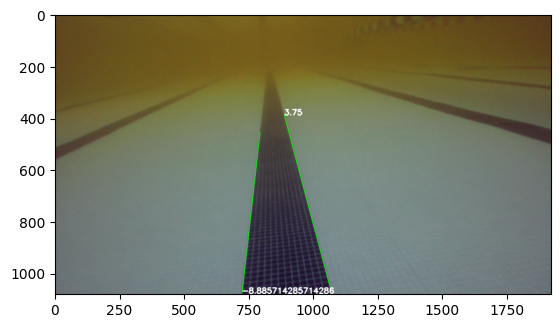

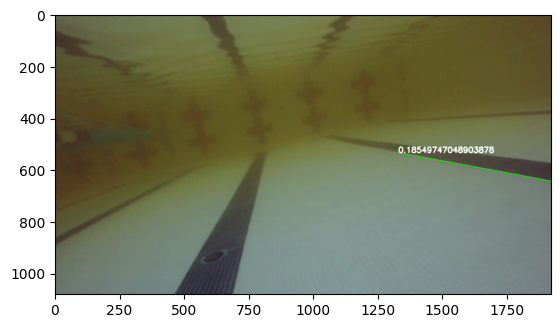

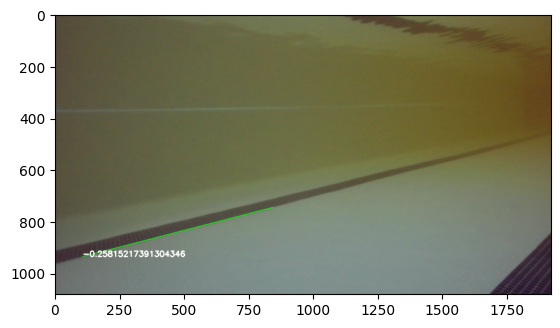

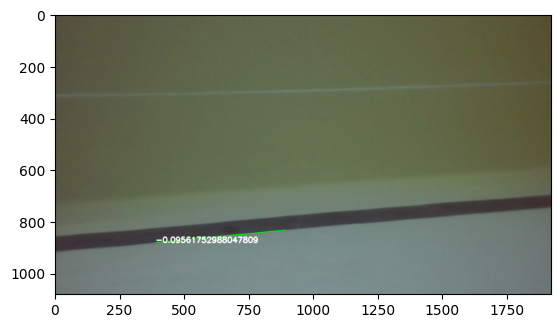

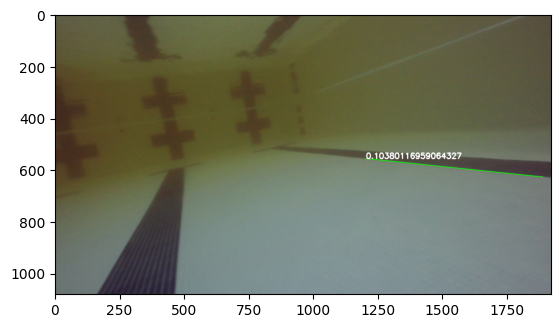

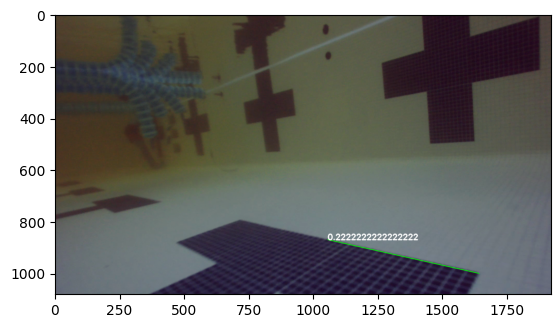

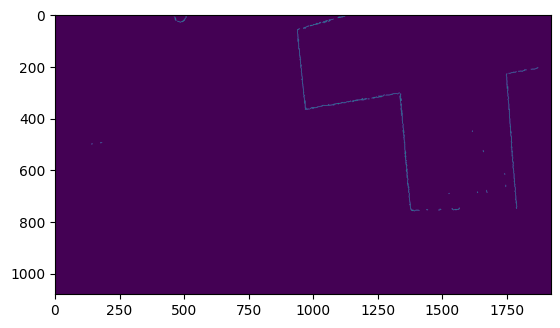

In [ ]:
vid = cv2.VideoCapture('AUV_Vid.mkv')
ret, img = vid.read()
frequency = 100
count = 0
while ret:
    if count%frequency == 0:
        gray = ret_gray(img)
        edges = ret_edges(gray)
        lines = ret_lines(edges)
        if (lines is None) or len(lines) == 0:
            count += 1
            ret, img = vid.read()
            continue
        img = get_lines(img, lines)[0]
        plt.imshow(img)
        plt.show()
    count += 1
    ret, img = vid.read()